In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

from datetime import datetime
from dateutil.parser import parse

import math
import os
import copy
import pickle

## Import Data

In [43]:
file = open('drug_df_prices', 'rb')
drug_df = pickle.load(file)

In [44]:
# Drop rows which have NaN in price per gram column
print(drug_df.shape)
drug_df = drug_df.dropna(subset=['price_per_gram'])
print(drug_df.shape)

(68378, 13)
(62753, 13)


# Explore statistics by drug

In [45]:
drugs = pd.unique(drug_df.drug_prediction)

In [46]:
# Function to get subset of data corresponding to particular drug
def getSubset(drug):
    return(drug_df[drug_df.drug_prediction == drug])

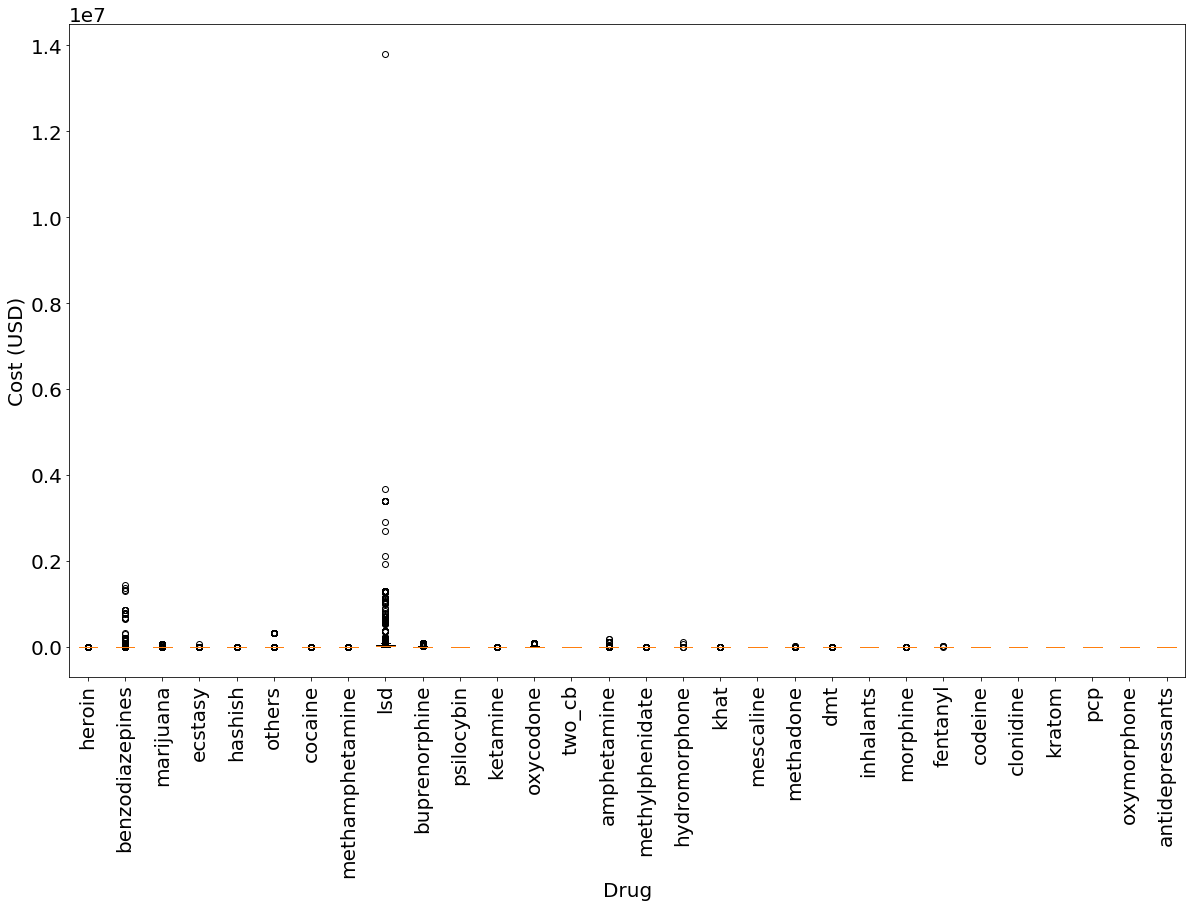

In [47]:
boxplot_data = [getSubset(drug)['price_per_gram'] for drug in drugs]

plt.figure(figsize = (20,12))
plt.rcParams.update({'font.size': 20})
plt.boxplot(boxplot_data, labels = drugs)
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Cost (USD)')
plt.show()

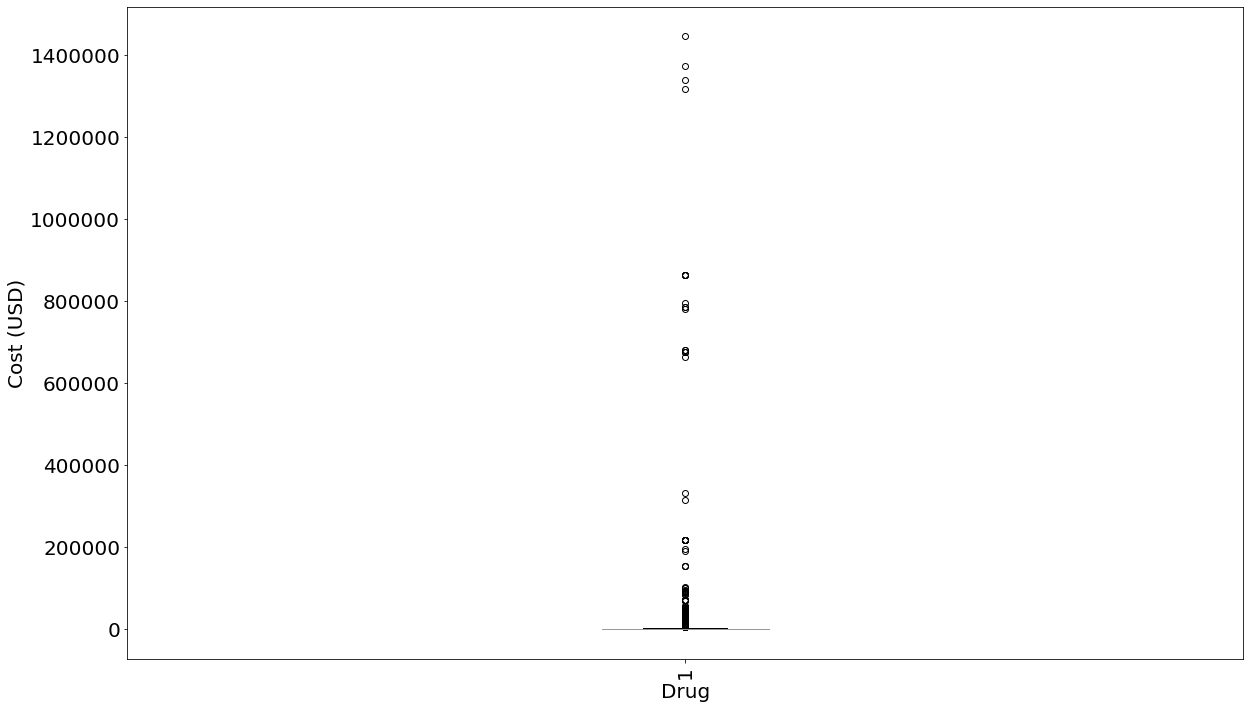

In [52]:
boxplot_data = [getSubset(drug)['price_per_gram'] for drug in drugs]

plt.figure(figsize = (20,12))
plt.rcParams.update({'font.size': 20})
plt.boxplot(getSubset('benzodiazepines')['price_per_gram'])
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Cost (USD)')
plt.show()

In [54]:
def remove_outliers(x):
#     Function to remove outliers
#     Use boxplot method to identify outliers
    q1 = np.percentile(x,25) # calculate 1st and 3rd quartiles
    q3 = np.percentile(x,75)
    iqr = q3-q1 # compute inter-quartile range
    ul = q3 + 1.5*iqr # compute upper and lower limits for non-outliers
    ll = q1 - 1.5*iqr
    y = [i for i in x if (i > ll) and (i < ul)]
    return(y)

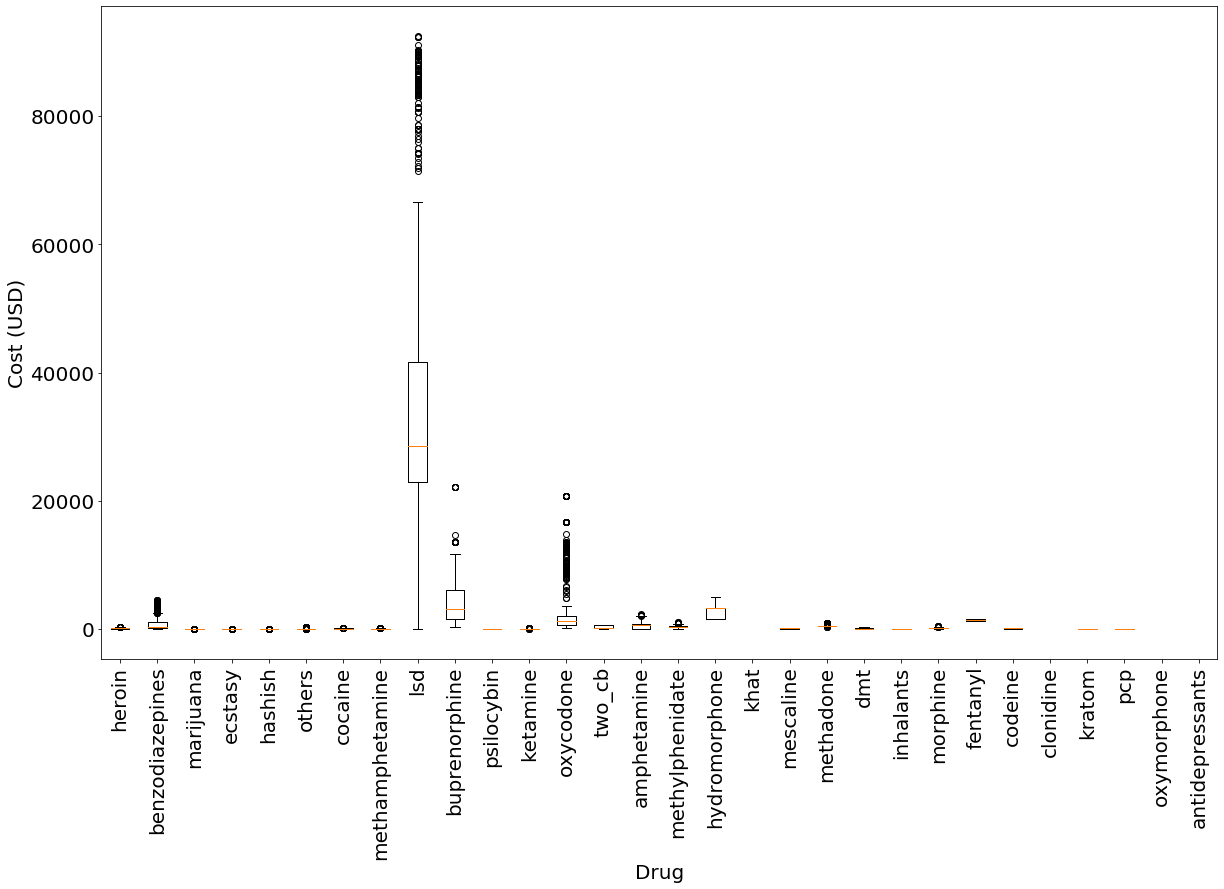

In [60]:
boxplot_data_no_outliers = [remove_outliers(getSubset(drug)['price_per_gram']) for drug in drugs]

plt.figure(figsize = (20,12))
plt.rcParams.update({'font.size': 20})
plt.boxplot(boxplot_data_no_outliers, labels = drugs)
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Cost (USD)')
plt.show()

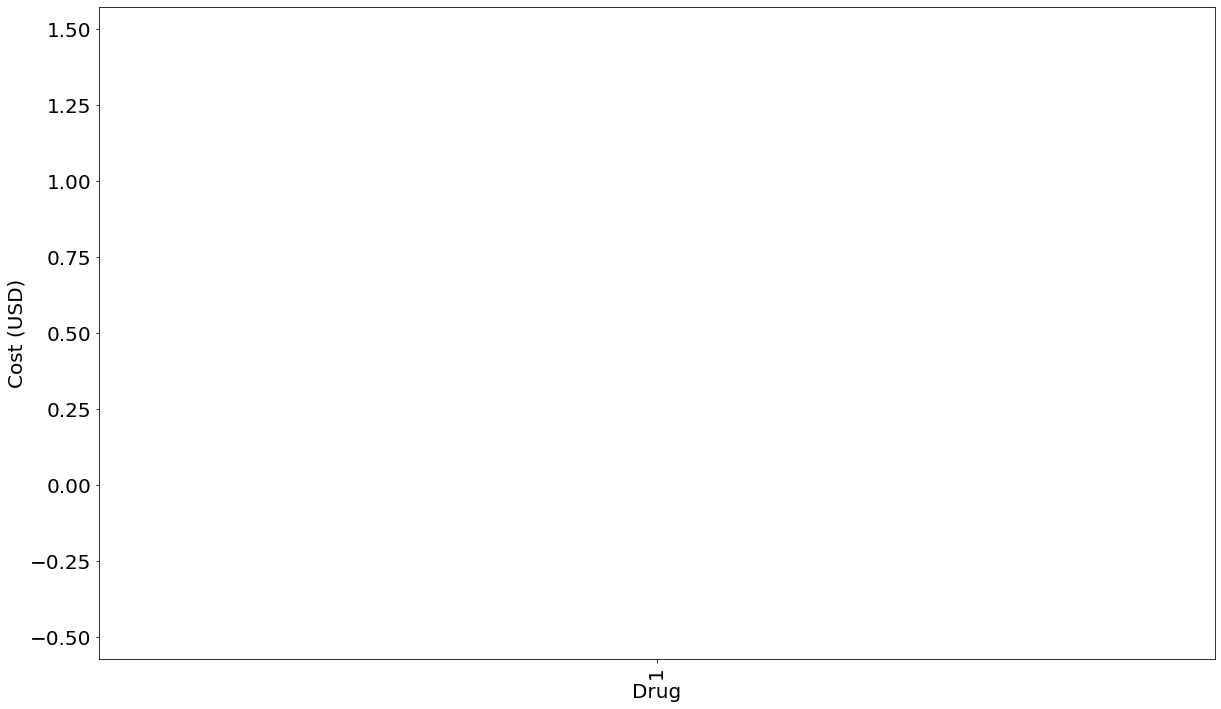

In [81]:
plt.figure(figsize = (20,12))
plt.rcParams.update({'font.size': 20})
# plt.boxplot(remove_outliers(getSubset('marijuana')['price_per_gram']))
plt.boxplot(getSubset('anti_depressants')['price_per_gram'])
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Cost (USD)')
plt.show()

In [85]:
drug_medians = {drug:np.median(remove_outliers(getSubset(drug)['price_per_gram'])) for drug in drugs}
drug_medians = {key:drug_medians[key] for key in drug_medians.keys() if not(math.isnan(drug_medians[key]))}

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [102]:
drug_medians

{'heroin': 104.0,
 'benzodiazepines': 277.3333333333333,
 'marijuana': 11.769,
 'ecstasy': 18.417142857142856,
 'hashish': 11.81,
 'others': 19.469,
 'cocaine': 82.90285714285714,
 'methamphetamine': 18.274285714285714,
 'lsd': 28600.832,
 'buprenorphine': 3185.0,
 'psilocybin': 5.981485714285713,
 'ketamine': 32.14742857142857,
 'oxycodone': 1213.3333333333335,
 'two_cb': 182.68888888888884,
 'amphetamine': 624.0,
 'methylphenidate': 358.8,
 'hydromorphone': 3250.0,
 'mescaline': 157.587,
 'methadone': 444.3695,
 'dmt': 74.88,
 'inhalants': 3.6684303350970016,
 'morphine': 145.0,
 'fentanyl': 1352.0,
 'codeine': 105.91964285714286,
 'kratom': 0.13999966666666666,
 'pcp': 44.305}

In [106]:
drug_medians_logscale = {drug : np.log(drug_medians[drug]) for drug in drug_medians.keys() if 
                         np.log(drug_medians[drug]) > 0}

import operator
sorted_x = sorted(drug_medians_logscale.items(), key=operator.itemgetter(1))

In [110]:
x_vals = [pair[0] for pair in sorted_x]
y_vals = [pair[1] for pair in sorted_x]

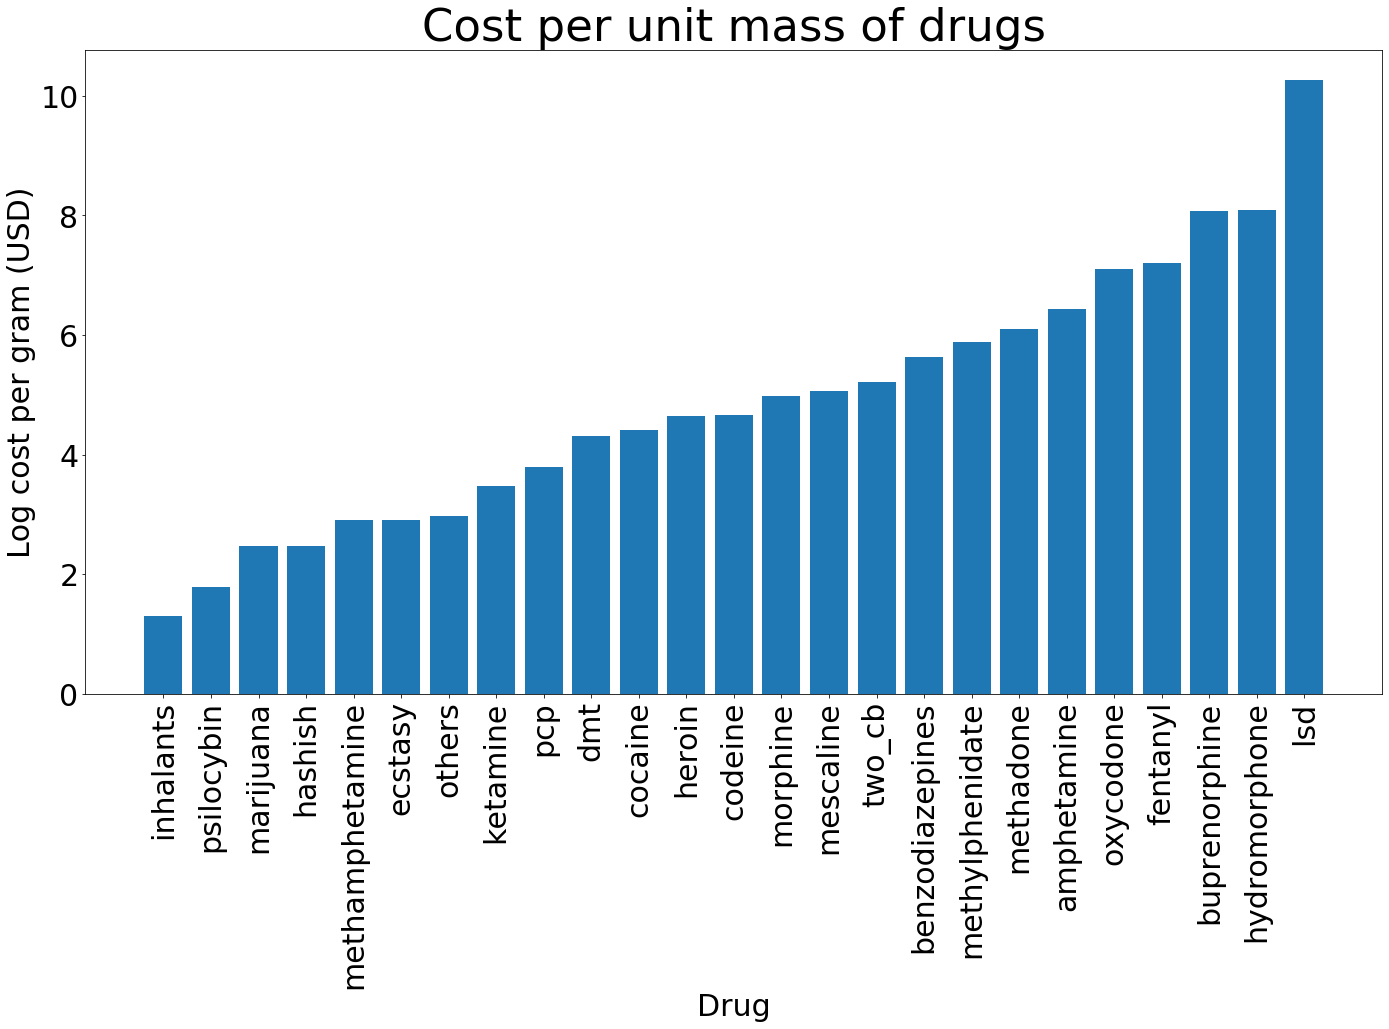

In [152]:
plt.rcParams.update({'font.size': 30})
t = plt.figure(figsize=(20,15))
# plt.bar(drug_medians_logscale.keys(), drug_medians_logscale.values())
plt.bar(x_vals, y_vals)
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Log cost per gram (USD)')
plt.title('Cost per unit mass of drugs', fontsize = 45)
plt.tight_layout()
plt.show()
t.savefig('cost.png', dpi = 300)

## Look at total mass sold

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


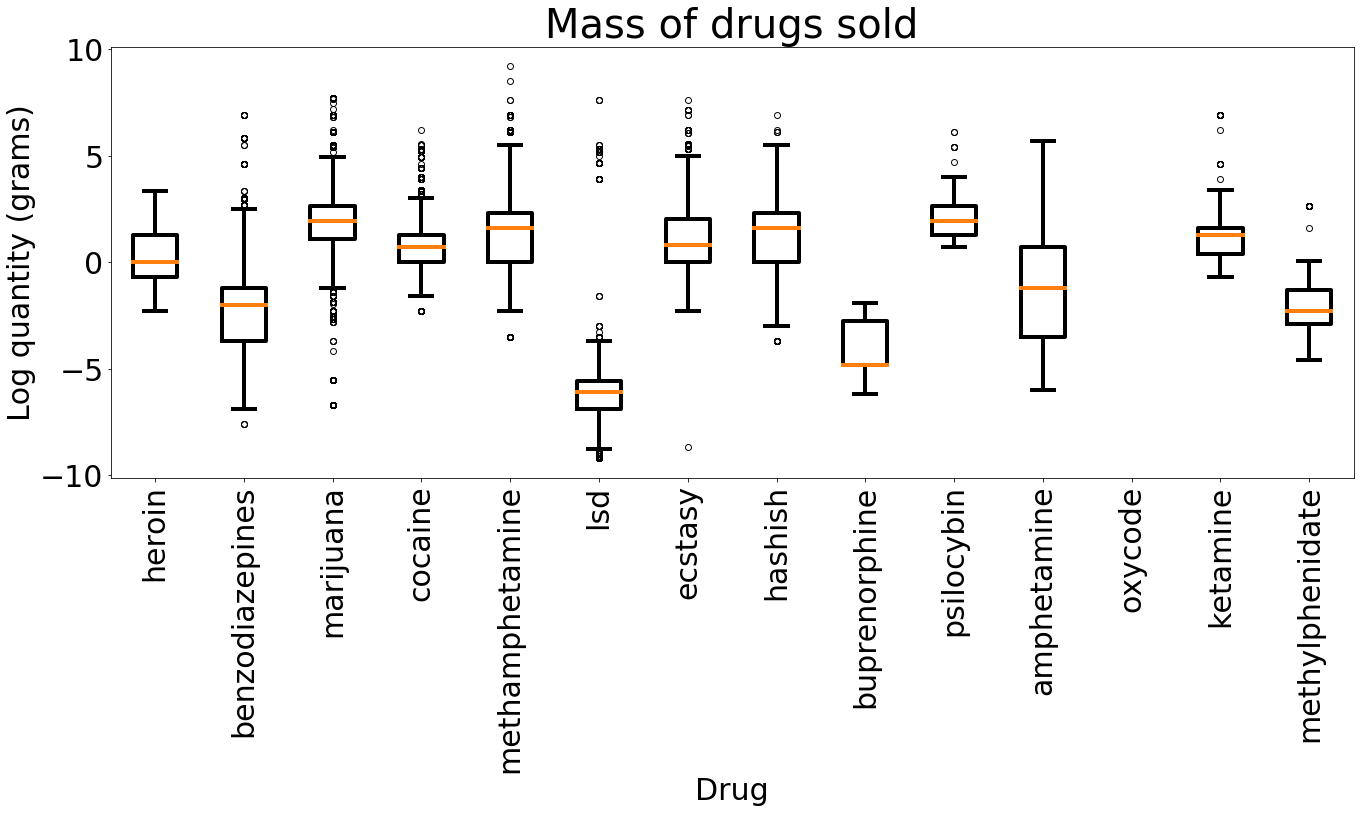

In [153]:
drug_subset = ['heroin', 'benzodiazepines', 'marijuana', 'cocaine', 'methamphetamine', 
              'lsd', 'ecstasy', 'hashish', 'buprenorphine', 'psilocybin','amphetamine', 'oxycode',
              'ketamine','methylphenidate']
boxplot_data = [np.log(getSubset(drug)['total_mass']) for drug in drug_subset]
# boxplot_data = [getSubset(drug)['total_mass'] for drug in drugs]

q = plt.figure(figsize = (20,12))
plt.rcParams.update({'font.size': 30})
t = plt.boxplot(boxplot_data, labels = drug_subset)
lw = 4
for box in t['boxes']:
#     print(box)
    box.set(linewidth=4)
## change color and linewidth of the whiskers
for whisker in t['whiskers']:
    whisker.set(linewidth=lw)

## change color and linewidth of the caps
for cap in t['caps']:
    cap.set(linewidth=lw)

## change color and linewidth of the medians
for median in t['medians']:
    median.set(linewidth=lw)

## change the style of fliers and their fill
for flier in t['fliers']:
    flier.set(marker='o',alpha=10, linewidth = 100)
    
plt.xticks(rotation=90)
plt.xlabel('Drug')
plt.ylabel('Log quantity (grams)')
plt.title('Mass of drugs sold', fontsize = 40)
plt.tight_layout()
plt.show()
q.savefig('boxplots.png',dpi = 250)

In [122]:
getSubset('kratom').sort_values(by = 'total_mass')

,transaction_id,vendor_id,vendor_name,bitcoin_amt,USD,product_description,date,drug_prediction,unit_mass,unit_mass_grams,count,total_mass,price_per_gram
103622,'104720,4137,KratomUkOnly,0.00652,26.400,"100g Green Elephant Kratom, Vacuum Sealed",2019-01-10 21:07:18,kratom,100g,100.0,NaN,100.0,0.2640
103623,'104721,4137,KratomUkOnly,0.00652,23.890,"100g Green Elephant Kratom, Vacuum Sealed",2019-01-13 21:07:18,kratom,100g,100.0,NaN,100.0,0.2389
103624,'104722,4137,KratomUkOnly,0.00652,26.350,"100g Green Elephant Kratom, Vacuum Sealed",2019-01-09 21:07:18,kratom,100g,100.0,NaN,100.0,0.2635
57053,'58151,1795,IndonesianKratom,-1.00000,419.999,Kratom Green Maeng Da 3Kg. Read description,2018-11-09 18:55:07,kratom,3kg,3000.0,NaN,3000.0,0.1400
57054,'58152,1795,IndonesianKratom,-1.00000,419.999,Kratom Green Maeng Da 3Kg. Read description,2018-11-05 18:55:07,kratom,3kg,3000.0,NaN,3000.0,0.1400
59984,'61082,1795,IndonesianKratom,-1.00000,419.999,Kratom Green Maeng Da 3Kg. Read description,2018-11-09 19:40:25,kratom,3kg,3000.0,NaN,3000.0,0.1400
59985,'61083,1795,IndonesianKratom,-1.00000,419.999,Kratom Green Maeng Da 3Kg. Read description,2018-11-05 19:40:25,kratom,3kg,3000.0,NaN,3000.0,0.1400
